In [1]:
# %matplotlib
# %matplotlib inline
import sys
sys.path.append('../..')
import numpy
import gillespy2

In [2]:
class ToggleSwitch(gillespy2.Model):
    """ Gardner et al. Nature (1999)
    'Construction of a genetic toggle switch in Escherichia coli'
    """
    def __init__(self, parameter_values=None):
        # Initialize the model.
        gillespy2.Model.__init__(self, name="toggle_switch")
        # Parameters
        alpha1 = gillespy2.Parameter(name='alpha1', expression=1)
        alpha2 = gillespy2.Parameter(name='alpha2', expression=1)
        beta = gillespy2.Parameter(name='beta', expression="2.0")
        gamma = gillespy2.Parameter(name='gamma', expression="2.0")
        mu = gillespy2.Parameter(name='mu', expression=1.0)
        self.add_parameter([alpha1, alpha2, beta, gamma, mu])

        # Species
        U = gillespy2.Species(name='U', initial_value=10)
        V = gillespy2.Species(name='V', initial_value=10)
        self.add_species([U, V])

        # Reactions
        cu = gillespy2.Reaction(name="r1",reactants={}, products={U:1},
                propensity_function="alpha1/(1+pow(V,beta))")
        cv = gillespy2.Reaction(name="r2",reactants={}, products={V:1},
                propensity_function="alpha2/(1+pow(U,gamma))")
        du = gillespy2.Reaction(name="r3",reactants={U:1}, products={},
                rate=mu)
        dv = gillespy2.Reaction(name="r4",reactants={V:1}, products={},
                rate=mu)
        self.add_reaction([cu,cv,du,dv])
        self.timespan(numpy.linspace(0,100,101))

In [3]:
model = ToggleSwitch()

In [4]:
#Default solver for model.run() is the VariableSSACSolver. For more information,
# checkout /examples/AdvancedFeatures/Variable_SSA_C_Example.ipynb
results = model.run()

In [5]:
# If you have the deterministic solver
from gillespy2 import ODESolver
dresults = model.run(solver=ODESolver)

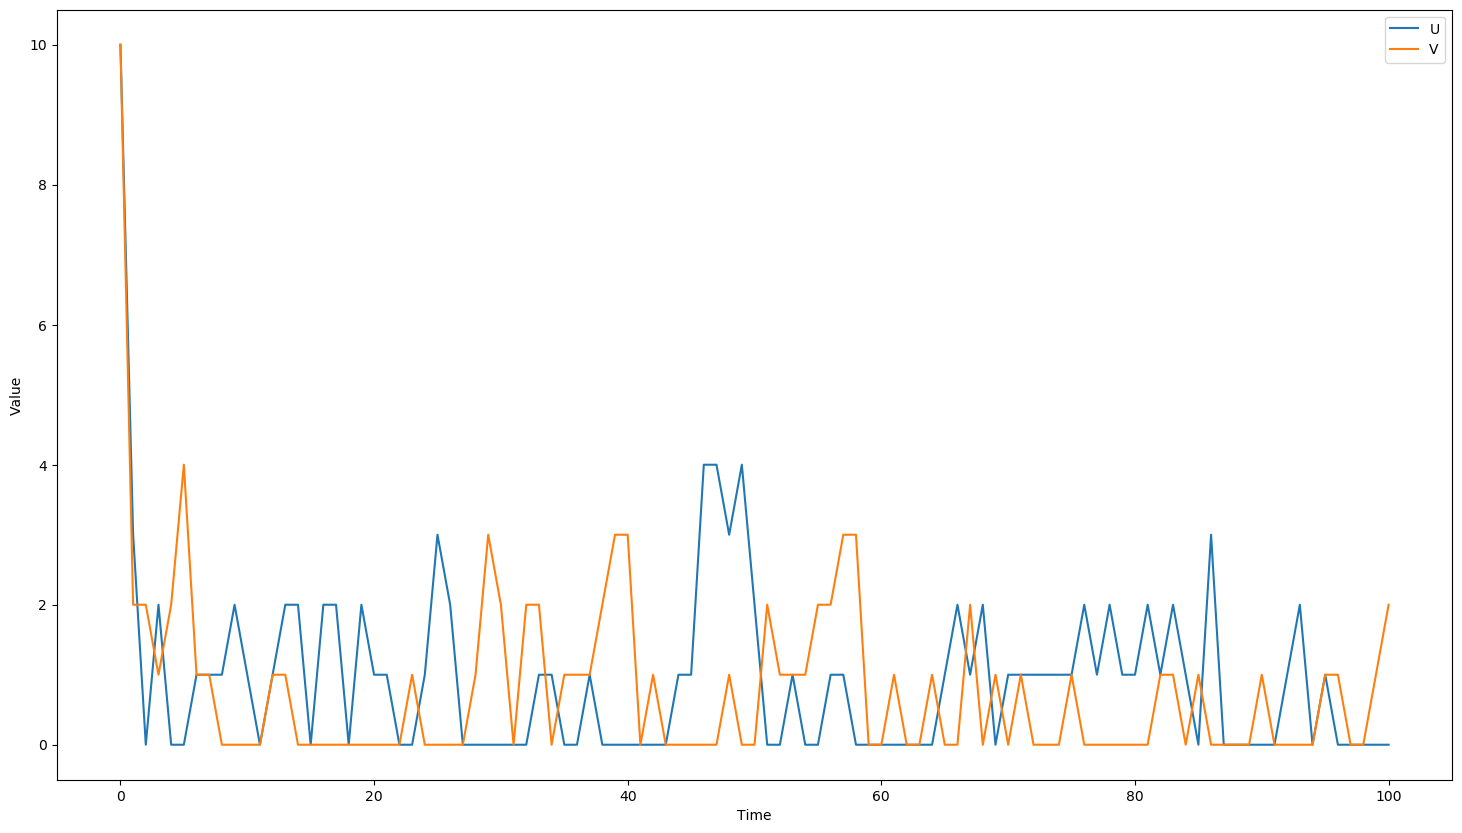

In [6]:
results.plot()

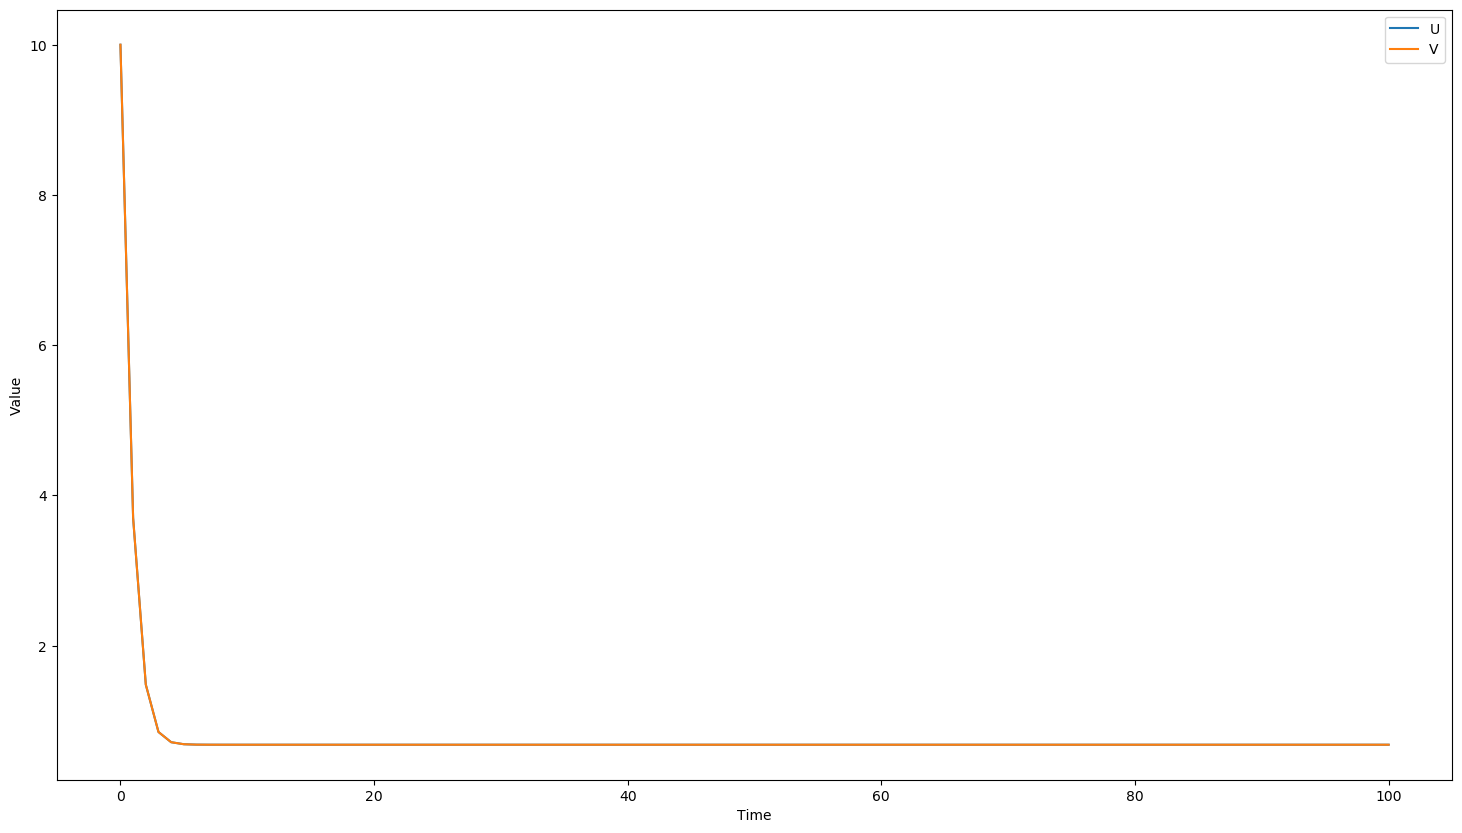

In [7]:
dresults.plot()

$$
X_i(t+\tau) = X_i(t) + \sum_{j=1}^M \nu_{ji} \left[ a_j(x_t)\tau + \left( a_j(x_t)\tau \right)^{1/2} \mathcal{N}(0,1) \right]
$$

In [8]:
from gillespy2.solvers.numpy.CLE_solver import CLESolver

In [9]:
cresults = model.run(solver=CLESolver, debug=True)

t =  100.0
increment =  1.0
Setting Random number  -0.5301236153241572  for  r1
Setting Random number  -0.6237751236865918  for  r2
Setting Random number  -0.7169743902903525  for  r3
Setting Random number  -0.3640051174366263  for  r4
Curr Time:  0  Save time:  1.0 step:  0.1
Reactions Fired:  {'r1': 0.03519977967182675, 'r2': -0.02384507725509675, 'r3': 1.2181353679713363, 'r4': 1.182471593975634}
Curr Time:  0.1  Save time:  1.0 step:  0.11341046537675727
Reactions Fired:  {'r1': -0.044901552503748506, 'r2': 0.007264646336720021, 'r3': 0.5738664267694984, 'r4': -0.6499107227308434}
Curr Time:  0.21341046537675729  Save time:  1.0 step:  0.1133171048960121
Reactions Fired:  {'r1': -0.04196133417469598, 'r2': 0.06299545103081784, 'r3': 1.7609427343469832, 'r4': 0.8933618847522448}
Curr Time:  0.3267275702727694  Save time:  1.0 step:  0.12508714479515246
Reactions Fired:  {'r1': 0.02987988613538652, 'r2': 0.0439637022691039, 'r3': 1.0525955276486942, 'r4': -0.27428433688636056}
Curr T

Curr Time:  98.18543503426478  Save time:  99.0 step:  0.7469258945903213
Reactions Fired:  {'r1': -0.21806025326624773, 'r2': 0.44143352246227174, 'r3': 0.4285566285249721, 'r4': 1.9048182230819157}
Negative state detected: curr_state[V]= -0.43441216841635377
	rxn={'r1': -0.21806025326624773, 'r2': 0.44143352246227174, 'r3': 0.4285566285249721, 'r4': 1.9048182230819157}
Resetting curr_state[U]= 1.3388209021036637
	Rejecting step, taking step of half size, tau_step=0.37346294729516066
Curr Time:  98.18543503426478  Save time:  99.0 step:  0.37346294729516066
Reactions Fired:  {'r1': 1.8094202754312925, 'r2': 0.20922813890450695, 'r3': -0.16007760531669335, 'r4': 0.45943837099191975}
Curr Time:  98.55889798155995  Save time:  99.0 step:  0.3176376724679622
Reactions Fired:  {'r1': 0.9990553322574539, 'r2': -0.1865011806052687, 'r3': 0.24941980403960728, 'r4': -0.36828090724101614}
Curr Time:  98.87653565402792  Save time:  99.0 step:  0.12346434597208145
Reactions Fired:  {'r1': 0.16604

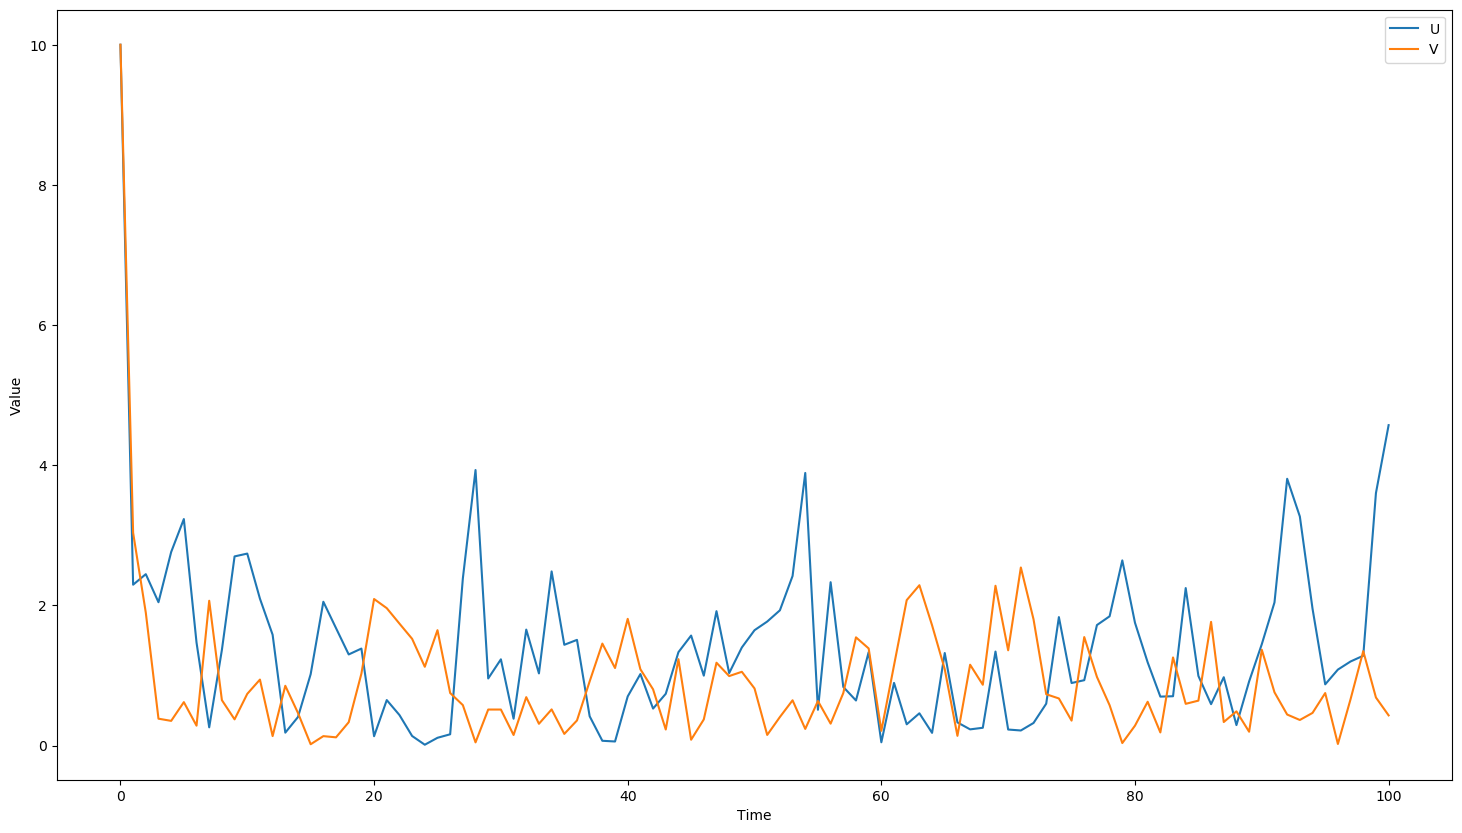

In [10]:
cresults.plot()